In [22]:
#importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns


#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
df_DS_US = df[(df['job_title_short']=='Data Scientist') & (df['job_country']=='United States')].copy()

In [ ]:
df_DS_US['job_posted_month_no'] = df_DS_US['job_posted_date'].dt.month

In [ ]:
df_DS_US_explode = df_DS_US.explode('job_skills')

In [ ]:
df_DS_US_pivot = df_DS_US_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

In [ ]:
df_DS_US_pivot.loc['Total'] = df_DS_US_pivot.sum()

In [ ]:
df_DS_US_pivot = df_DS_US_pivot[df_DS_US_pivot.loc['Total'].sort_values(ascending=False).index]

In [ ]:
df_DS_US_pivot.drop('Total', inplace=True)

In [ ]:
DA_totals = df_DS_US.groupby('job_posted_month_no').size()

In [ ]:
df_DS_US_percent = df_DS_US_pivot.div(DA_totals/100, 0)

In [ ]:
#Change month no to month name
df_DS_US_percent.reset_index(inplace=True)
df_DS_US_percent['job_posted_month'] = df_DS_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DS_US_percent = df_DS_US_percent.set_index('job_posted_month')
df_DS_US_percent = df_DS_US_percent.drop(columns = 'job_posted_month_no')
df_DS_US_percent

job_skills,python,sql,r,sas,tableau,aws,spark,java,tensorflow,azure,...,fedora,mattermost,nuix,asp.net core,shogun,clickup,ocaml,wrike,symfony,couchdb
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,75.820680,54.519161,48.618944,24.584237,23.571945,19.725235,19.609544,13.246565,12.957339,11.814895,...,0.000000,0.000000,0.014461,0.014461,0.000000,0.014461,0.000000,0.000000,0.014461,0.014461
Feb,75.020178,53.874092,47.094431,23.083132,25.585149,17.231638,18.058918,13.014528,11.400323,11.561743,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,71.019042,50.763758,45.804562,23.938062,23.561415,17.744298,16.467880,12.031806,11.069261,11.257585,...,0.000000,0.000000,0.000000,0.000000,0.020925,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,74.419560,50.606123,44.811999,24.738032,24.922950,18.122046,16.909801,12.779947,11.958085,11.054037,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,73.840530,52.387480,46.058944,26.273703,26.822024,18.208819,17.683345,14.370573,11.811743,11.903130,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,73.864370,52.572659,45.360603,24.930032,24.434876,17.610334,17.696448,12.615716,11.560818,12.228202,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021529,0.000000,0.000000
Jul,72.621001,50.840853,45.324036,22.682527,25.082034,17.637408,16.447908,11.915505,11.689910,12.448728,...,0.020509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,72.269706,52.611586,45.837290,25.292814,24.058246,17.030706,17.014878,12.139918,12.804685,11.506806,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,68.126095,47.176007,39.207531,25.350263,20.161996,15.258319,16.199650,11.690018,12.412434,12.215412,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


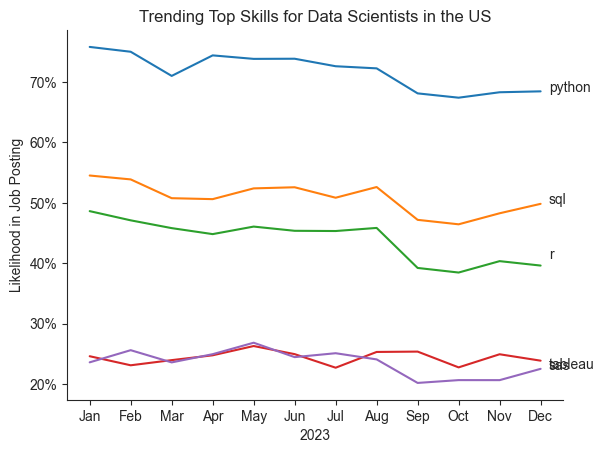

In [ ]:
df_plot = df_DS_US_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_style('ticks')
sns.despine()

plt.title('Trending Top Skills for Data Scientists in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter

plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))
offsets = [0, 0, 1.2, -1.5, 0]
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i] + offsets[i], df_plot.columns[i])

plt.show()